| <img src ='https://bit.ly/39XPeCc' width=200 align='left'> |
|:--|
|<h1>   Random_forest_xtrain_xtest.ipynb
</h1>

## 사용함수의 정의

In [1]:
""" 
# 기본적인 module import 위치로 작업폴더 변경 getcwd() --> chidr()
# HOME 을 지정하고 작업폴더를 HOME 으로 변경.
"""
import os

HOME= 'dacon_competition_2020'
dir_base = "".join(os.getcwd().partition(HOME)[:2]) + "\\"
os.chdir(dir_base)     

In [2]:
from _assets.config_dirs import *
from _assets.modules import *


# 화일분석에 필요한 공동폴더를 등록합니다.
- asset = dir_base + '_assets/'
- statics dir_base + '_statics/'

#  echo = True : SYS.PATH INSERT 상황 보여줌


# OS 화일 및 DF 정보조회를 위한 탐색 모듈



In [3]:
"""
# RandomForestClassifier 클래스를 import
"""
import numpy as np
import pandas as pd
 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
x = pd.read_csv(dir_base + remake + 'df_xtrain_remake.csv')
y = pd.read_csv(dir_base + remake + 'df_ytrain_remake.csv')['winner']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [5]:
show_infoDF_from(x)

*** DATA SHAPE = [ 38,872 x 27 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38872 entries, 0 to 38871
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_id                  38872 non-null  int64  
 1   P0_species               38872 non-null  int64  
 2   P0_Ability               38872 non-null  float64
 3   P0_AddToControlGroup     38872 non-null  float64
 4   P0_Camera                38872 non-null  float64
 5   P0_ControlGroup          38872 non-null  float64
 6   P0_GetControlGroup       38872 non-null  float64
 7   P0_Right Click           38872 non-null  float64
 8   P0_Selection             38872 non-null  float64
 9   P0_SetControlGroup       38872 non-null  float64
 10  P1_species               38872 non-null  int64  
 11  P1_Ability               38872 non-null  float64
 12  P1_AddToControlGroup     38872 non-null  float64
 13  P1_Camera                38872 non-null  f

In [6]:
"""
# tree개수 Random Forest 분류 모듈 생성
# 그냥 Default 값을 사용한다.
# 차이점 = 정렬된 Data 사용 <==> shuffled data-set 사용
"""
rfc = RandomForestClassifier(          # default = *                    
                    bootstrap=True,    # 붓스트랩 생성*
                    criterion='gini',  # 지니계수 검정*
                    max_features='auto', # 최대피처=자동*
    
                    n_estimators=400,  # 트리갯수=400개
                    oob_score=True,    # OOB스코링 사용!
                    verbose=1,         # 상세하게 에코!
                    warm_start=True,   # 웜스타트=OK
                )

In [7]:
"""
# X_train과 Y_train을 입력해 모듈을 학습 시킨다.
"""

rfc.fit(X_train, Y_train) 
pred = rfc.predict(X_test)

# print(pred == Y_test)
print("Accuracy is: ", accuracy_score(pred, Y_test))
print("----" * 20)
print(classification_report(pred, Y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is:  0.6054019292604501
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      3903
           1       0.60      0.61      0.61      3872

    accuracy                           0.61      7775
   macro avg       0.61      0.61      0.61      7775
weighted avg       0.61      0.61      0.61      7775



[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished


In [8]:
"""
# Initialize the model
# 트리수=200개, OOB 스코어링을 사용한다.
"""
rfc_01 = RandomForestClassifier(             # default = *                    
                            bootstrap=True,  # 붓스트랩 생성*
                            criterion='gini', # 지니계수 검정*
    
                            max_features=5,   # Num features = 5
                            n_estimators=600, # Number of trees = 600개
                            oob_score=True,  # Use OOB scoring
                            verbose=1,       # 상세하게 에코!
                        )

In [9]:
rfc_01.fit(X_train, Y_train)
pred_01 = rfc_01.predict(X_test)

# print(pred_01 == Y_test)
print("Accuracy is : ", accuracy_score(pred_01, Y_test))
print("----" * 20)
print(classification_report(pred_01, Y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is :  0.607588424437299
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      3892
           1       0.61      0.61      0.61      3883

    accuracy                           0.61      7775
   macro avg       0.61      0.61      0.61      7775
weighted avg       0.61      0.61      0.61      7775



[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.6s finished


In [10]:
"""
# 각 feature의 중요도를 확인 한다.
"""

for feature, imp in zip(x.columns, rfc_01.feature_importances_):
    print(f"* {feature:18} = {imp}")

* game_id            = 0.05422944176279381
* P0_species         = 0.01151263618854489
* P0_Ability         = 0.04552076725457002
* P0_AddToControlGroup = 0.01884560324605008
* P0_Camera          = 0.051752012076350745
* P0_ControlGroup    = 0.003925316468014027
* P0_GetControlGroup = 0.04617724513524995
* P0_Right Click     = 0.04929202671584916
* P0_Selection       = 0.04992196560077485
* P0_SetControlGroup = 0.027313993660028454
* P1_species         = 0.011203872253338906
* P1_Ability         = 0.045819667835515915
* P1_AddToControlGroup = 0.018832731811713296
* P1_Camera          = 0.05172108328115607
* P1_ControlGroup    = 0.003897676093854016
* P1_GetControlGroup = 0.04473316827429511
* P1_Right Click     = 0.0496911200804743
* P1_Selection       = 0.04926046890901066
* P1_SetControlGroup = 0.02712634077003319
* delta_Ability      = 0.06375782862238415
* delta_AddToControlGroup = 0.028084160557412675
* delta_Camera       = 0.05144004825310425
* delta_ControlGroup = 0.0074412680315

In [11]:
features = pd.DataFrame(
            zip(x.columns,rfc_01.feature_importances_), 
            columns=['features', 'importance']
        ).sort_values(
                    by='importance', 
                    ascending=False,
                )
features

,features,importance
19,delta_Ability,0.063758
0,game_id,0.054229
23,delta_GetControlGroup,0.053517
4,P0_Camera,0.051752
13,P1_Camera,0.051721
21,delta_Camera,0.051440
25,delta_Selection,0.051057
24,delta_Right Click,0.050607
8,P0_Selection,0.049922
16,P1_Right Click,0.049691


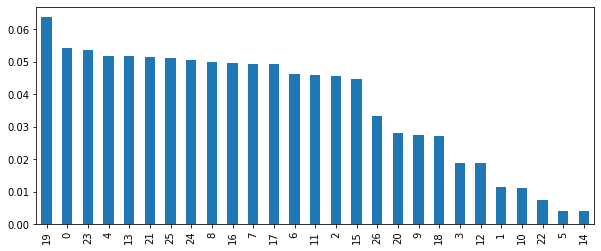

In [23]:
features.importance.plot.bar(figsize=(10,4))